# Alpha-Blending Sandbox
This notebook is a test-bed for alpha-blending

In [2]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

# Load motiondeblur module and Dataset class
import libwallerlab.projects.motiondeblur as md
from libwallerlab.utilities.io import Dataset, isDataset
from llops import simulation as sim

# Platform imports
import os, glob

# Debugging imports
import llops as yp
import numpy as np
import matplotlib.pyplot as plt

yp.config.setDefaultBackend('numpy')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
x = sim.brain()  

In [5]:
yp.shape(x)

(1098, 1604)

In [88]:
# Define user for path setting
dataset_path = '/Users/zfphil/datasets/motiondeblur/'

# Define which dataset to use
dataset_type = 'coded'
dataset_label =  'res'

# Find files in this directory
folder_list = glob.glob(os.path.join(dataset_path, '*/'))
dataset_list = [folder for folder in folder_list if isDataset(folder)]

# Filter datasets in directory
filtered_dataset_list = [folder_name for folder_name in folder_list if (dataset_type in folder_name) and (dataset_label in folder_name)]
assert not len(filtered_dataset_list) > 1, "More than one dataset with criterion found!"
assert not len(filtered_dataset_list) == 0, "No dataset with criterion found!"

# Create dataset object (loads metadata)
dataset = Dataset(filtered_dataset_list[0])

# Force type to be motiondeblur
dataset.metadata.type = 'motiondeblur'

# Select green channel
dataset.channel_mask = [0]

# Preprocess dataset (md-specific)
md.preprocess(dataset)

Loading 1 frames...


# Create Reconstruction Object And Normalize Measurements

In [185]:
# Set position segment
dataset.position_segment_indicies = [1,2,3,4,5]

# Create recon object
recon = md.recon.Reconstruction(dataset, alpha_blend_distance=50)

# Apply position offset
recon.applyPositionOffset()

# Apply segment lateral offset
recon.applySegmentLateralOffset()

# Generate the forward model (Need to call this after applyPositionOffset)
recon._gen_forward_model()

<IPython.core.display.Javascript object>


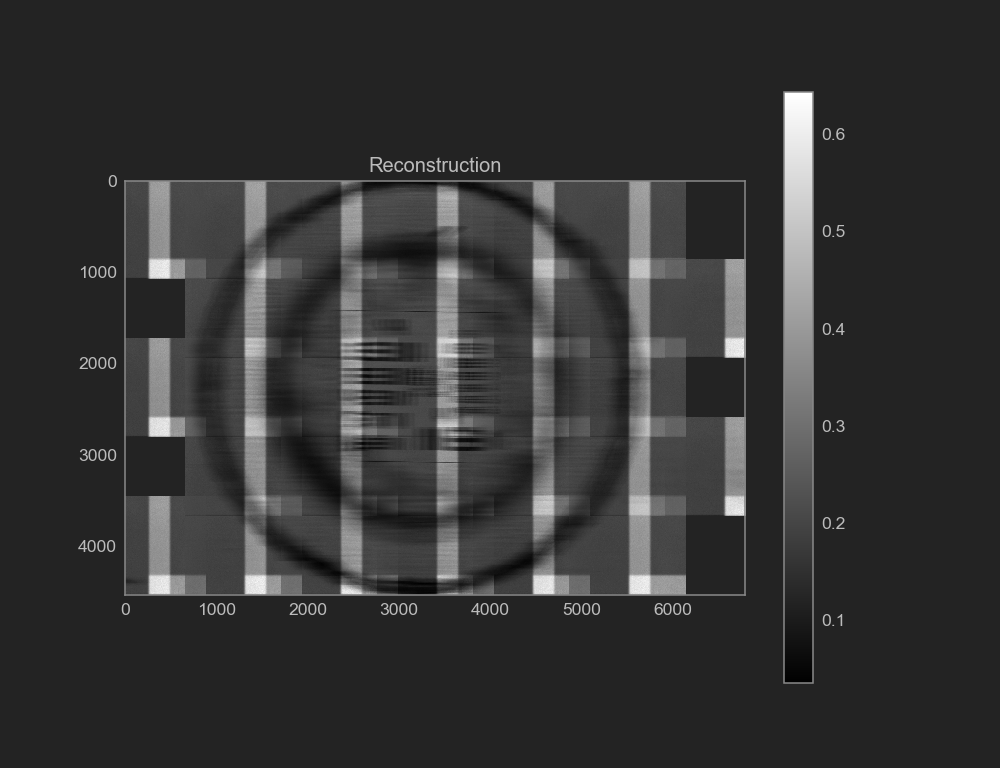

In [186]:
recon.reconstruct(iteration_count=-1, mode='static')
recon.show()

## Phase-Correlation Based Registration

In [84]:
offsets_xc = recon.register_measurements(method='xc', preprocess_methods=['normalize', 'highpass'], replace_untrusted=True,
                                         debug=False, write_results=False, energy_ratio_threshold=100.0)

## ORB-Based Registration

In [78]:
offsets_orb = recon.register_measurements(method='orb', preprocess_methods=['normalize'], debug=False, write_results=False)

/Users/zfphil/.conda/lib/python3.7/site-packages/scikit_image-0.14.1-py3.7-macosx-10.7-x86_64.egg/skimage/transform/_geometric.py:101: RuntimeWarning: Mean of empty slice.
  src_mean = src.mean(axis=0)
/Users/zfphil/.conda/lib/python3.7/site-packages/scikit_image-0.14.1-py3.7-macosx-10.7-x86_64.egg/skimage/transform/_geometric.py:102: RuntimeWarning: Mean of empty slice.
  dst_mean = dst.mean(axis=0)


# Compare XC and ORB

<IPython.core.display.Javascript object>


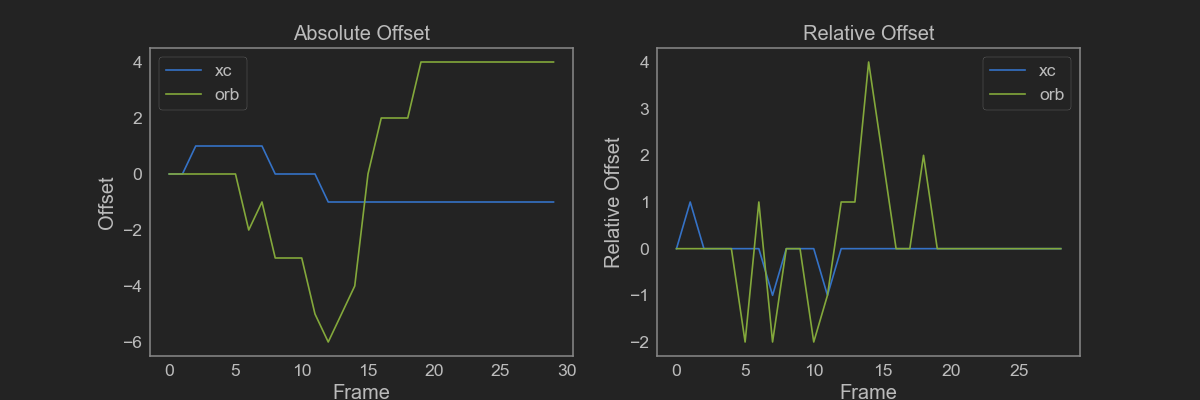

Text(0.5, 1.0, 'Relative Offset')

In [85]:
plt.figure()
plt.subplot(121)
plt.plot(np.asarray(offsets_xc)[:, 1], label='xc')
plt.plot(np.asarray(offsets_orb)[:, 1], label='orb')
plt.legend()
plt.xlabel('Frame')
plt.ylabel('Offset')
plt.title('Absolute Offset')

plt.subplot(122)
plt.plot(np.diff(np.asarray(offsets_xc)[:, 1]), label='xc')
plt.plot(np.diff(np.asarray(offsets_orb)[:, 1]), label='orb')
plt.legend()
plt.xlabel('Frame')
plt.ylabel('Relative Offset')
plt.title('Relative Offset')

## Optimization-Based Registration

In [6]:
offsets = recon.register_measurements(method='optimize', preprocess_methods=['normalize'], axis=1, debug=False, write_results=True)
print(offsets)

Minimizing function:


<IPython.core.display.Latex object>

|  Iter  |      Cost      | Elapsed time (s) |  Norm of Step  | Memory Usage (CPU/GPU) |
+ ------ + -------------- + ---------------- + -------------- + ---------------------- +
|    0   |    7.96e+08    |       0.00       |    0.00e+00    | 3567.2 MB /    0.0 MB  |
Met convergence requirement (delta < 1.00E-14) at iteration 54
Minimizing function:


<IPython.core.display.Latex object>

|  Iter  |      Cost      | Elapsed time (s) |  Norm of Step  | Memory Usage (CPU/GPU) |
+ ------ + -------------- + ---------------- + -------------- + ---------------------- +
|    0   |    6.69e+08    |       0.00       |    0.00e+00    | 3630.9 MB /    0.0 MB  |
Met convergence requirement (delta < 1.00E-14) at iteration 69
Minimizing function:


<IPython.core.display.Latex object>

|  Iter  |      Cost      | Elapsed time (s) |  Norm of Step  | Memory Usage (CPU/GPU) |
+ ------ + -------------- + ---------------- + -------------- + ---------------------- +
|    0   |    7.58e+08    |       0.00       |    0.00e+00    | 3660.5 MB /    0.0 MB  |
Met convergence requirement (delta < 1.00E-14) at iteration 98
Minimizing function:


<IPython.core.display.Latex object>

|  Iter  |      Cost      | Elapsed time (s) |  Norm of Step  | Memory Usage (CPU/GPU) |
+ ------ + -------------- + ---------------- + -------------- + ---------------------- +
|    0   |    4.94e+08    |       0.00       |    0.00e+00    | 3652.3 MB /    0.0 MB  |
|  100   |    4.94e+08    |      10.43       |    1.48e-07    | 3727.2 MB /    0.0 MB  |
Met convergence requirement (delta < 1.00E-14) at iteration 165
Minimizing function:


<IPython.core.display.Latex object>

|  Iter  |      Cost      | Elapsed time (s) |  Norm of Step  | Memory Usage (CPU/GPU) |
+ ------ + -------------- + ---------------- + -------------- + ---------------------- +
|    0   |    6.35e+07    |       0.00       |    0.00e+00    | 3650.8 MB /    0.0 MB  |
Met convergence requirement (delta < 1.00E-14) at iteration 29
Minimizing function:


<IPython.core.display.Latex object>

|  Iter  |      Cost      | Elapsed time (s) |  Norm of Step  | Memory Usage (CPU/GPU) |
+ ------ + -------------- + ---------------- + -------------- + ---------------------- +
|    0   |    8.78e+07    |       0.00       |    0.00e+00    | 3729.9 MB /    0.0 MB  |
Met convergence requirement (delta < 1.00E-14) at iteration 91
Minimizing function:


<IPython.core.display.Latex object>

|  Iter  |      Cost      | Elapsed time (s) |  Norm of Step  | Memory Usage (CPU/GPU) |
+ ------ + -------------- + ---------------- + -------------- + ---------------------- +
|    0   |    4.35e+07    |       0.00       |    0.00e+00    | 3683.7 MB /    0.0 MB  |
Met convergence requirement (delta < 1.00E-14) at iteration 68
Minimizing function:


<IPython.core.display.Latex object>

|  Iter  |      Cost      | Elapsed time (s) |  Norm of Step  | Memory Usage (CPU/GPU) |
+ ------ + -------------- + ---------------- + -------------- + ---------------------- +
|    0   |    4.88e+07    |       0.00       |    0.00e+00    | 3721.8 MB /    0.0 MB  |
Met convergence requirement (delta < 1.00E-14) at iteration 60
Minimizing function:


<IPython.core.display.Latex object>

|  Iter  |      Cost      | Elapsed time (s) |  Norm of Step  | Memory Usage (CPU/GPU) |
+ ------ + -------------- + ---------------- + -------------- + ---------------------- +
|    0   |    1.84e+07    |       0.00       |    0.00e+00    | 3742.9 MB /    0.0 MB  |
|  100   |    1.83e+07    |      10.12       |    5.01e-08    | 3822.0 MB /    0.0 MB  |
Met convergence requirement (delta < 1.00E-14) at iteration 125
Minimizing function:


<IPython.core.display.Latex object>

|  Iter  |      Cost      | Elapsed time (s) |  Norm of Step  | Memory Usage (CPU/GPU) |
+ ------ + -------------- + ---------------- + -------------- + ---------------------- +
|    0   |    7.04e+07    |       0.00       |    0.00e+00    | 3776.6 MB /    0.0 MB  |
Met convergence requirement (delta < 1.00E-14) at iteration 59
Minimizing function:


<IPython.core.display.Latex object>

|  Iter  |      Cost      | Elapsed time (s) |  Norm of Step  | Memory Usage (CPU/GPU) |
+ ------ + -------------- + ---------------- + -------------- + ---------------------- +
|    0   |    1.83e+08    |       0.00       |    0.00e+00    | 3789.3 MB /    0.0 MB  |
Met convergence requirement (delta < 1.00E-14) at iteration 90
Minimizing function:


<IPython.core.display.Latex object>

|  Iter  |      Cost      | Elapsed time (s) |  Norm of Step  | Memory Usage (CPU/GPU) |
+ ------ + -------------- + ---------------- + -------------- + ---------------------- +
|    0   |    7.30e+08    |       0.00       |    0.00e+00    | 3869.5 MB /    0.0 MB  |
Met convergence requirement (delta < 1.00E-14) at iteration 70
Minimizing function:


<IPython.core.display.Latex object>

|  Iter  |      Cost      | Elapsed time (s) |  Norm of Step  | Memory Usage (CPU/GPU) |
+ ------ + -------------- + ---------------- + -------------- + ---------------------- +
|    0   |    1.98e+08    |       0.00       |    0.00e+00    | 3813.4 MB /    0.0 MB  |
|  100   |    1.97e+08    |      11.23       |    2.42e-08    | 3881.1 MB /    0.0 MB  |
Met convergence requirement (delta < 1.00E-14) at iteration 116
Minimizing function:


<IPython.core.display.Latex object>

|  Iter  |      Cost      | Elapsed time (s) |  Norm of Step  | Memory Usage (CPU/GPU) |
+ ------ + -------------- + ---------------- + -------------- + ---------------------- +
|    0   |    1.82e+08    |       0.00       |    0.00e+00    | 3903.3 MB /    0.0 MB  |
|  100   |    1.81e+08    |      11.13       |    2.62e-07    | 3889.6 MB /    0.0 MB  |
Met convergence requirement (delta < 1.00E-14) at iteration 140
Minimizing function:


<IPython.core.display.Latex object>

|  Iter  |      Cost      | Elapsed time (s) |  Norm of Step  | Memory Usage (CPU/GPU) |
+ ------ + -------------- + ---------------- + -------------- + ---------------------- +
|    0   |    1.04e+08    |       0.00       |    0.00e+00    | 3883.3 MB /    0.0 MB  |
Met convergence requirement (delta < 1.00E-14) at iteration 80
Minimizing function:


<IPython.core.display.Latex object>

|  Iter  |      Cost      | Elapsed time (s) |  Norm of Step  | Memory Usage (CPU/GPU) |
+ ------ + -------------- + ---------------- + -------------- + ---------------------- +
|    0   |    8.38e+07    |       0.00       |    0.00e+00    | 3945.6 MB /    0.0 MB  |
Met convergence requirement (delta < 1.00E-14) at iteration 60
Minimizing function:


<IPython.core.display.Latex object>

|  Iter  |      Cost      | Elapsed time (s) |  Norm of Step  | Memory Usage (CPU/GPU) |
+ ------ + -------------- + ---------------- + -------------- + ---------------------- +
|    0   |    1.74e+08    |       0.00       |    0.00e+00    | 3970.6 MB /    0.0 MB  |
Met convergence requirement (delta < 1.00E-14) at iteration 47
Minimizing function:


<IPython.core.display.Latex object>

|  Iter  |      Cost      | Elapsed time (s) |  Norm of Step  | Memory Usage (CPU/GPU) |
+ ------ + -------------- + ---------------- + -------------- + ---------------------- +
|    0   |    1.12e+08    |       0.00       |    0.00e+00    | 3949.8 MB /    0.0 MB  |
Met convergence requirement (delta < 1.00E-14) at iteration 54
Minimizing function:


<IPython.core.display.Latex object>

|  Iter  |      Cost      | Elapsed time (s) |  Norm of Step  | Memory Usage (CPU/GPU) |
+ ------ + -------------- + ---------------- + -------------- + ---------------------- +
|    0   |    2.17e+07    |       0.00       |    0.00e+00    | 3962.5 MB /    0.0 MB  |
|  100   |    1.89e+07    |      11.53       |    7.98e-08    | 3948.8 MB /    0.0 MB  |
|  200   |    1.89e+07    |      23.46       |    5.67e-09    | 4014.2 MB /    0.0 MB  |
Met convergence requirement (delta < 1.00E-14) at iteration 214
Minimizing function:


<IPython.core.display.Latex object>

|  Iter  |      Cost      | Elapsed time (s) |  Norm of Step  | Memory Usage (CPU/GPU) |
+ ------ + -------------- + ---------------- + -------------- + ---------------------- +
|    0   |    3.22e+07    |       0.00       |    0.00e+00    | 4048.0 MB /    0.0 MB  |
Met convergence requirement (delta < 1.00E-14) at iteration 97
Minimizing function:


<IPython.core.display.Latex object>

|  Iter  |      Cost      | Elapsed time (s) |  Norm of Step  | Memory Usage (CPU/GPU) |
+ ------ + -------------- + ---------------- + -------------- + ---------------------- +
|    0   |    2.05e+07    |       0.00       |    0.00e+00    | 4021.4 MB /    0.0 MB  |
Met convergence requirement (delta < 1.00E-14) at iteration 93
Minimizing function:


<IPython.core.display.Latex object>

|  Iter  |      Cost      | Elapsed time (s) |  Norm of Step  | Memory Usage (CPU/GPU) |
+ ------ + -------------- + ---------------- + -------------- + ---------------------- +
|    0   |    2.07e+07    |       0.00       |    0.00e+00    | 4029.8 MB /    0.0 MB  |
|  100   |    2.07e+07    |       9.90       |    6.74e-08    | 4096.6 MB /    0.0 MB  |
|  200   |    2.07e+07    |      19.84       |    2.04e-08    | 4073.4 MB /    0.0 MB  |
|  300   |    2.07e+07    |      29.81       |    5.50e-09    | 4052.3 MB /    0.0 MB  |
|  400   |    2.07e+07    |      39.76       |    1.29e-09    | 4128.2 MB /    0.0 MB  |
|  500   |    2.07e+07    |      49.72       |    4.91e-10    | 4102.9 MB /    0.0 MB  |
|  600   |    2.07e+07    |      59.67       |    4.37e-11    | 4081.8 MB /    0.0 MB  |
|  700   |    2.07e+07    |      69.61       |    1.49e-10    | 4157.8 MB /    0.0 MB  |
|  800   |    2.07e+07    |      79.53       |    3.82e-11    | 4136.7 MB /    0.0 MB  |
Met convergence requi

<IPython.core.display.Latex object>

|  Iter  |      Cost      | Elapsed time (s) |  Norm of Step  | Memory Usage (CPU/GPU) |
+ ------ + -------------- + ---------------- + -------------- + ---------------------- +
|    0   |    7.00e+08    |       0.00       |    0.00e+00    | 4136.7 MB /    0.0 MB  |
Met convergence requirement (delta < 1.00E-14) at iteration 96
Minimizing function:


<IPython.core.display.Latex object>

|  Iter  |      Cost      | Elapsed time (s) |  Norm of Step  | Memory Usage (CPU/GPU) |
+ ------ + -------------- + ---------------- + -------------- + ---------------------- +
|    0   |    9.05e+07    |       0.00       |    0.00e+00    | 4139.9 MB /    0.0 MB  |
Met convergence requirement (delta < 1.00E-14) at iteration 37
Minimizing function:


<IPython.core.display.Latex object>

|  Iter  |      Cost      | Elapsed time (s) |  Norm of Step  | Memory Usage (CPU/GPU) |
+ ------ + -------------- + ---------------- + -------------- + ---------------------- +
|    0   |    4.38e+08    |       0.00       |    0.00e+00    | 4203.2 MB /    0.0 MB  |
|  100   |    4.37e+08    |      10.82       |    6.18e-08    | 4193.8 MB /    0.0 MB  |
Met convergence requirement (delta < 1.00E-14) at iteration 130
Minimizing function:


<IPython.core.display.Latex object>

|  Iter  |      Cost      | Elapsed time (s) |  Norm of Step  | Memory Usage (CPU/GPU) |
+ ------ + -------------- + ---------------- + -------------- + ---------------------- +
|    0   |    4.43e+08    |       0.00       |    0.00e+00    | 4253.9 MB /    0.0 MB  |
|  100   |    4.42e+08    |      11.13       |    3.21e-07    | 4244.4 MB /    0.0 MB  |
Met convergence requirement (delta < 1.00E-14) at iteration 130
Minimizing function:


<IPython.core.display.Latex object>

|  Iter  |      Cost      | Elapsed time (s) |  Norm of Step  | Memory Usage (CPU/GPU) |
+ ------ + -------------- + ---------------- + -------------- + ---------------------- +
|    0   |    1.88e+08    |       0.00       |    0.00e+00    | 4204.1 MB /    0.0 MB  |
Met convergence requirement (delta < 1.00E-14) at iteration 48
Minimizing function:


<IPython.core.display.Latex object>

|  Iter  |      Cost      | Elapsed time (s) |  Norm of Step  | Memory Usage (CPU/GPU) |
+ ------ + -------------- + ---------------- + -------------- + ---------------------- +
|    0   |    8.02e+08    |       0.00       |    0.00e+00    | 4291.9 MB /    0.0 MB  |
Met convergence requirement (delta < 1.00E-14) at iteration 73
Minimizing function:


<IPython.core.display.Latex object>

|  Iter  |      Cost      | Elapsed time (s) |  Norm of Step  | Memory Usage (CPU/GPU) |
+ ------ + -------------- + ---------------- + -------------- + ---------------------- +
|    0   |    8.35e+08    |       0.00       |    0.00e+00    | 4232.9 MB /    0.0 MB  |
|  100   |    8.34e+08    |      10.26       |    1.31e-08    | 4320.4 MB /    0.0 MB  |
Met convergence requirement (delta < 1.00E-14) at iteration 104
[array([0, 0]), array([0, 0]), array([ 0, -1]), array([ 0, -1]), array([ 0, -1]), array([ 0, -1]), array([ 0, -1]), array([ 0, -1]), array([ 0, -1]), array([ 0, -1]), array([ 0, -1]), array([ 0, -1]), array([ 0, -1]), array([ 0, -1]), array([ 0, -1]), array([ 0, -1]), array([ 0, -1]), array([ 0, -1]), array([ 0, -1]), array([ 0, -1]), array([ 0, -1]), array([ 0, -1]), array([ 0, -1]), array([ 0, -1]), array([ 0, -1]), array([ 0, -1]), array([ 0, -2]), array([ 0, -2]), array([ 0, -3]), array([ 0, -3])]
